<a href="https://colab.research.google.com/github/BrianArradondo/Project-2-options-Brian-Arradondo.ipynb/blob/main/Project_2_Adult_Income_Brian_Arradondo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Adult Income DataSet
1. Kaggle was the Source of data

2. Brief description of data - The data describes the features related to adult incomes.

3. What is the target? income is the target.

4. What does one row represent? One row represents education

5. Is this a classification or regression problem? This is a regression problem.

6. How many features does the data have? This has 488842 entries and 14 rows.

7. How many rows are in the dataset? 14 rows.

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset? I don't foresee any challenges in this dataset.
---

**To meet the requirements for this week you must have:**

**Deleted unnecessary columns.**
1. Deleted duplicate rows.
2. Identified and addressed missing values.
3. Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).
4. Produced univariate visuals for the target and all features.
5. Identified outliers.
6. Clearly commented all of your cleaning steps and described any decisions you made.
7. Commit your file to your Github repository and submit the link below.
---

# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore") # Prevents visual warnings and ignores them
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project 2 Adult income Dataset.csv")
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [5]:
df.info() # This line of code tells me the Datatypes, the column names and categories within those columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.nunique() # This line of code tells me the unique values in each column.

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [7]:
df["fnlwgt"].value_counts()

203488    21
190290    19
120277    19
125892    18
126569    18
          ..
188488     1
285290     1
293579     1
114874     1
257302     1
Name: fnlwgt, Length: 28523, dtype: int64

In [8]:
df["fnlwgt"].nunique() # This column has a large amount of unique values

28523

## Delete Unnecessary Columns

- Unnecessary columns will be deleted that add no analytical value to our Data set.

In [9]:
df.drop(columns=["fnlwgt"], inplace=True) # Dropping these columns in this line of code because they have no analytical value
df.drop(columns=["educational-num"], inplace=True)
df.drop(columns=["capital-gain"], inplace=True) # These columns can be dropped because they are measured after income happens. Capital gains tax is the taxation of capital assets.
df.drop(columns=["capital-loss"], inplace=True)
df.drop(columns=["relationship"], inplace=True)
df.head(10)

,age,workclass,education,marital-status,occupation,race,gender,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,White,Male,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Black,Male,40,United-States,>50K
4,18,?,Some-college,Never-married,?,White,Female,30,United-States,<=50K
5,34,Private,10th,Never-married,Other-service,White,Male,30,United-States,<=50K
6,29,?,HS-grad,Never-married,?,Black,Male,40,United-States,<=50K
7,63,Self-emp-not-inc,Prof-school,Married-civ-spouse,Prof-specialty,White,Male,32,United-States,>50K
8,24,Private,Some-college,Never-married,Other-service,White,Female,40,United-States,<=50K
9,55,Private,7th-8th,Married-civ-spouse,Craft-repair,White,Male,10,United-States,<=50K


 - Removing the columns "fnlwgt" as it seems to carry no relevant analytical meaning. Removing the column educational-num column as it seemed redundant and mimicked the preexisiting "education" column. 

## Drop Duplicate Values

In [10]:
df.duplicated().sum() # This line of code checks for the number of duplicates.

9421

In [11]:
df = df.drop_duplicates() # This line of code drops all the duplicates.

In [12]:
print(f"The duplicates have been dropped and there are {df.duplicated().sum()} remaining")

The duplicates have been dropped and there are 0 remaining


#Identify and Address Missing Values

In [13]:
df.isna().sum() # This line of code shows there are no missing values in our Data Set

age               0
workclass         0
education         0
marital-status    0
occupation        0
race              0
gender            0
hours-per-week    0
native-country    0
income            0
dtype: int64

- There are no Missing Values that need to be addressed.

In [14]:
df["age"].unique() # This line of code gives me a look at whether or not there are any unique values.

array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87, 86])

In [15]:
df["age"].describe() # This column gives me a look at whether or not there are any outliers. There seems to be none.

count    39421.000000
mean        39.900738
std         13.848227
min         17.000000
25%         29.000000
50%         38.000000
75%         49.000000
max         90.000000
Name: age, dtype: float64

In [16]:
df["workclass"].value_counts() # This line of code tells me my value counts and they have no inconsistencies except the "?".

Private             25665
Self-emp-not-inc     3662
Local-gov            2908
?                    2279
State-gov            1897
Self-emp-inc         1608
Federal-gov          1371
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

##Identify and correct inconsistencies in data for categorical values. Bad value errors will be replaced with missing error "Nan" heading. 

In [17]:
df["workclass"] = df["workclass"].replace("?","Nan")
df["workclass"].value_counts()

Private             25665
Self-emp-not-inc     3662
Local-gov            2908
Nan                  2279
State-gov            1897
Self-emp-inc         1608
Federal-gov          1371
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

### For enhanced Data analysis I will combine Federal, Local Gov and State- Gov into one column under the heading "Government".

In [18]:
df["workclass"] = df["workclass"].replace("Local-gov","Government")
df["workclass"] = df["workclass"].replace("State-gov","Government")
df["workclass"] = df["workclass"].replace("Federal-gov","Government")
df["workclass"].value_counts()

Private             25665
Government           6176
Self-emp-not-inc     3662
Nan                  2279
Self-emp-inc         1608
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

### For workclass I will remove without-pay and never-worked as they represent such a small percentage relative to the whole dataset. 

In [19]:
df[df["workclass"] == "Without-pay"]

,age,workclass,education,marital-status,occupation,race,gender,hours-per-week,native-country,income
2957,19,Without-pay,HS-grad,Never-married,Other-service,White,Male,10,United-States,<=50K
3177,74,Without-pay,7th-8th,Married-civ-spouse,Farming-fishing,White,Male,20,United-States,<=50K
6466,51,Without-pay,Assoc-acdm,Married-civ-spouse,Sales,White,Male,45,United-States,<=50K
8903,64,Without-pay,HS-grad,Married-civ-spouse,Handlers-cleaners,White,Male,60,United-States,>50K
10647,50,Without-pay,HS-grad,Married-civ-spouse,Machine-op-inspct,White,Female,40,United-States,>50K
13836,39,Without-pay,HS-grad,Married-civ-spouse,Exec-managerial,White,Male,40,United-States,<=50K
14034,27,Without-pay,HS-grad,Never-married,Farming-fishing,White,Female,40,United-States,<=50K
18182,65,Without-pay,7th-8th,Widowed,Farming-fishing,White,Female,50,United-States,<=50K
25538,19,Without-pay,HS-grad,Never-married,Farming-fishing,White,Male,20,United-States,<=50K
31814,21,Without-pay,HS-grad,Never-married,Craft-repair,Black,Male,40,United-States,<=50K


In [20]:
df.drop(df.loc[df["workclass"] == "Without-pay"].index, inplace=True)
df["workclass"].value_counts()

Private             25665
Government           6176
Self-emp-not-inc     3662
Nan                  2279
Self-emp-inc         1608
Never-worked           10
Name: workclass, dtype: int64

In [21]:
df.drop(df.loc[df["workclass"] == "Never-worked"].index, inplace=True)
df["workclass"].value_counts()

Private             25665
Government           6176
Self-emp-not-inc     3662
Nan                  2279
Self-emp-inc         1608
Name: workclass, dtype: int64

In [22]:
df = df.rename(columns={"native-country":"native-continent"})
df.head()

,age,workclass,education,marital-status,occupation,race,gender,hours-per-week,native-continent,income
0,25,Private,11th,Never-married,Machine-op-inspct,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,White,Male,50,United-States,<=50K
2,28,Government,Assoc-acdm,Married-civ-spouse,Protective-serv,White,Male,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Black,Male,40,United-States,>50K
4,18,Nan,Some-college,Never-married,?,White,Female,30,United-States,<=50K


In [23]:
df["education"].value_counts() # This line of code reveals if this column has any error in the column values.

HS-grad         11655
Some-college     8433
Bachelors        6340
Masters          2362
Assoc-voc        1894
Assoc-acdm       1533
11th             1532
10th             1238
7th-8th           917
Prof-school       770
9th               731
12th              604
Doctorate         565
5th-6th           494
1st-4th           241
Preschool          81
Name: education, dtype: int64

- This block of code will reduce the school categories into more valuable analytical models.

In [24]:
df["education"] = df["education"].replace("1st-4th","Elementary")
df["education"] = df["education"].replace("5th-6th","Elementary")
df["education"] = df["education"].replace("7th-8th","Middle_School")
df["education"] = df["education"].replace("9th", "High_School")
df["education"] = df["education"].replace("10th", "High_School")
df["education"] = df["education"].replace("11th", "High_School")
df["education"] = df["education"].replace("12th", "High_School")
df["education"] = df["education"].replace("HS-grad", "High_School")
df["education"] = df["education"].replace("Assoc-acdm", "College")
df["education"] = df["education"].replace("Assoc-voc", "College")
df["education"] = df["education"].replace("Some-college", "College")
df["education"].value_counts()

High_School      15760
College          11860
Bachelors         6340
Masters           2362
Middle_School      917
Prof-school        770
Elementary         735
Doctorate          565
Preschool           81
Name: education, dtype: int64

In [25]:
df["marital-status"].value_counts() # this line of code reveals there are no value count errors in this column

Married-civ-spouse       18069
Never-married            11868
Divorced                  5833
Widowed                   1481
Separated                 1478
Married-spouse-absent      624
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [26]:
df["occupation"].value_counts() # This line of code reveals if this column has any error in the column values.

Prof-specialty       5327
Exec-managerial      4982
Sales                4371
Adm-clerical         4358
Craft-repair         4272
Other-service        4062
?                    2279
Machine-op-inspct    2272
Transport-moving     1982
Handlers-cleaners    1613
Farming-fishing      1400
Tech-support         1291
Protective-serv       928
Priv-house-serv       238
Armed-Forces           15
Name: occupation, dtype: int64

In [27]:
df["occupation"] = df["occupation"].replace("?","Nan") # This line of code replaces the "?" with a Nan value to be imputed in later processes.
df["occupation"].value_counts()

Prof-specialty       5327
Exec-managerial      4982
Sales                4371
Adm-clerical         4358
Craft-repair         4272
Other-service        4062
Nan                  2279
Machine-op-inspct    2272
Transport-moving     1982
Handlers-cleaners    1613
Farming-fishing      1400
Tech-support         1291
Protective-serv       928
Priv-house-serv       238
Armed-Forces           15
Name: occupation, dtype: int64

In [28]:
df["race"] = df["race"].replace("Amer-Indian-Eskimo","Other")
df["race"] = df["race"].replace("Asian-Pac-Islander","Other")
df["race"] = df["race"].replace("Black","Other")
df["race"].value_counts() # This line of code reveals if this column has any error in the column values.

White    32625
Other     6765
Name: race, dtype: int64

In [29]:
df["gender"].value_counts() # This line of code reveals if this column has any error in the column values.

Male      25980
Female    13410
Name: gender, dtype: int64

In [30]:
df["hours-per-week"].values # This line of code reveals if this column has any error in the column values.

array([40, 50, 40, ..., 38, 40, 40])

In [31]:
df["native-continent"].value_counts() # This line of code reveals if this column has any error in the column values.

United-States                 34435
Mexico                          919
?                               850
Philippines                     290
Germany                         204
Puerto-Rico                     184
Canada                          182
El-Salvador                     154
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         105
Italy                           104
Dominican-Republic              102
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          85
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           64
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [32]:
df["native-continent"] = df["native-continent"].replace("?","Nan") # This line of code replaces the "?" with a Nan value to be imputed in later processes.
df["native-continent"] = df["native-continent"].replace("United-States","North_America")
df["native-continent"] = df["native-continent"].replace("Mexico","North_America")
df["native-continent"] = df["native-continent"].replace("Canada","North_America")
df["native-continent"] = df["native-continent"].replace("Puerto-Rico","North_America")
df["native-continent"] = df["native-continent"].replace("Outlying-US(Guam-USVI-etc)","North_America")

df["native-continent"] = df["native-continent"].replace("El-Salvador","Central_America")
df["native-continent"] = df["native-continent"].replace("Guatemala","Central_America")
df["native-continent"] = df["native-continent"].replace("Honduras","Central_America")
df["native-continent"] = df["native-continent"].replace("Cuba","Carribean")
df["native-continent"] = df["native-continent"].replace("Jamaica","Carribean")
df["native-continent"] = df["native-continent"].replace("Dominican-Republic","Carribean")
df["native-continent"] = df["native-continent"].replace("Trinidad&Tobago","Carribean")
df["native-continent"] = df["native-continent"].replace("Trinadad&Tobago","Carribean")
df["native-continent"] = df["native-continent"].replace("Haiti","Carribean")

df["native-continent"] = df["native-continent"].replace("Columbia","South_America")
df["native-continent"] = df["native-continent"].replace("Peru","South_America")
df["native-continent"] = df["native-continent"].replace("Ecuador","South_America")
df["native-continent"] = df["native-continent"].replace("Nicaragua","South_America")

df["native-continent"] = df["native-continent"].replace("Germany","Europe")
df["native-continent"] = df["native-continent"].replace("England","Europe")
df["native-continent"] = df["native-continent"].replace("Poland","Europe")
df["native-continent"] = df["native-continent"].replace("Portugal","Europe")
df["native-continent"] = df["native-continent"].replace("Italy","Europe")
df["native-continent"] = df["native-continent"].replace("France","Europe")
df["native-continent"] = df["native-continent"].replace("Ireland","Europe")
df["native-continent"] = df["native-continent"].replace("Yugoslavia","Europe")
df["native-continent"] = df["native-continent"].replace("Scotland","Europe")
df["native-continent"] = df["native-continent"].replace("Hungary","Europe")
df["native-continent"] = df["native-continent"].replace("Holand-Netherlands","Europe")

df["native-continent"] = df["native-continent"].replace("Philippines","Asia")
df["native-continent"] = df["native-continent"].replace("India","Asia")
df["native-continent"] = df["native-continent"].replace("China","Asia")
df["native-continent"] = df["native-continent"].replace("Japan","Asia")
df["native-continent"] = df["native-continent"].replace("Vietnam","Asia")
df["native-continent"] = df["native-continent"].replace("Taiwan","Asia")
df["native-continent"] = df["native-continent"].replace("Iran","Asia")
df["native-continent"] = df["native-continent"].replace("Greece","Asia")
df["native-continent"] = df["native-continent"].replace("Cambodia","Asia")
df["native-continent"] = df["native-continent"].replace("Laos","Asia")
df["native-continent"] = df["native-continent"].replace("Hong","Asia")
df["native-continent"] = df["native-continent"].replace("Thailand","Asia")
df["native-continent"].value_counts()

North_America      35743
Asia                1023
Nan                  850
Europe               727
Carribean            447
Central_America      260
South_America        225
South                115
Name: native-continent, dtype: int64

In [33]:
df["income"].value_counts() # This line of code reveals if this column has any error in the column values.

<=50K    29808
>50K      9582
Name: income, dtype: int64

# Produce Univariate Visuals for the Target and all Features.

In [34]:
df.info() # this gives a concise look at all columns.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39390 entries, 0 to 48841
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               39390 non-null  int64 
 1   workclass         39390 non-null  object
 2   education         39390 non-null  object
 3   marital-status    39390 non-null  object
 4   occupation        39390 non-null  object
 5   race              39390 non-null  object
 6   gender            39390 non-null  object
 7   hours-per-week    39390 non-null  int64 
 8   native-continent  39390 non-null  object
 9   income            39390 non-null  object
dtypes: int64(2), object(8)
memory usage: 3.3+ MB


##This scatterplot displays a univariate visual of "age" feature.

In [35]:
# sns.scatterplot(x=df.index,y=df["age"], hue=df["age"]); # This scatterplot displays a univariate visual of age feature

In [36]:
# sns.scatterplot(x=df.index,y=df["education"], hue=df["education"]);

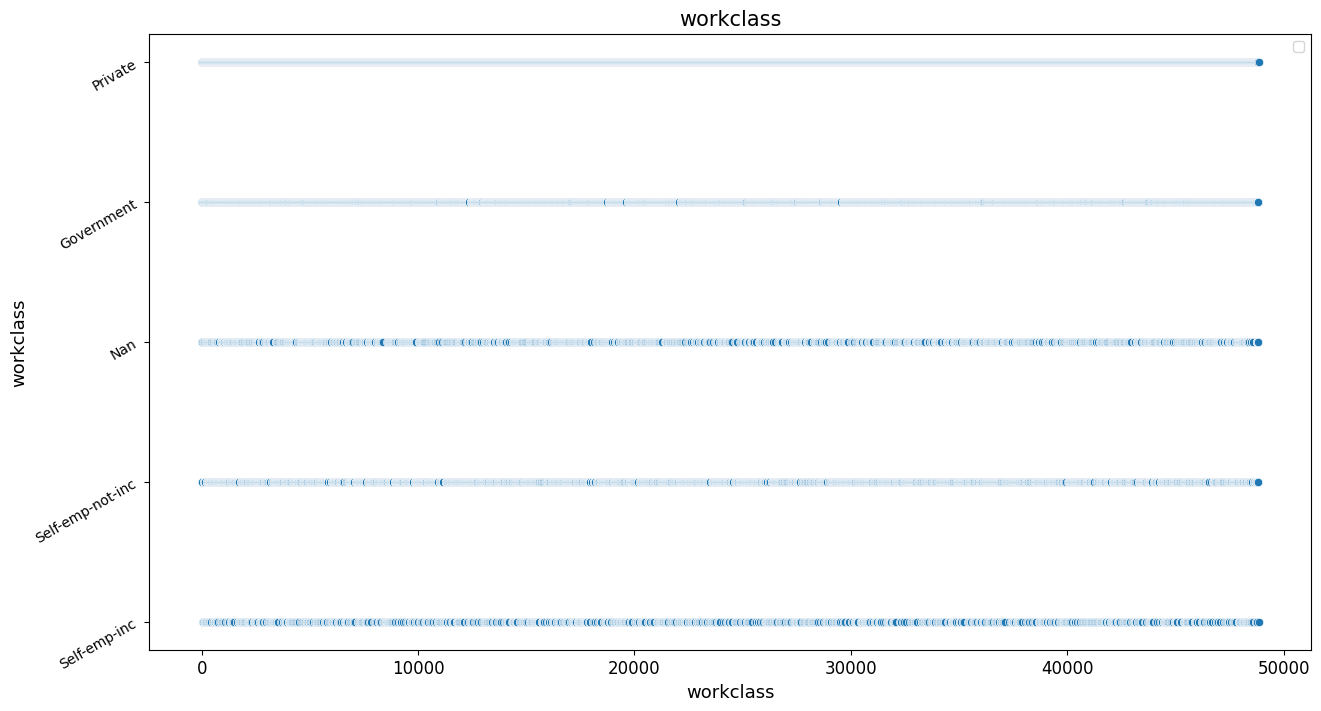

In [37]:
fig, ax = plt.subplots(figsize=(15,8))

sns.scatterplot(df["workclass"])

ax.set_title("workclass", fontsize = 15, loc="center")
ax.set_ylabel("workclass", fontsize = 13)
ax.set_xlabel("workclass", fontsize = 13)
plt.tick_params(axis="x", which="major", labelsize=12)
plt.tick_params(axis="y", which="major", labelsize=10)
ax.yaxis.tick_left() # where the y axis marks will be
plt.yticks(rotation=30)

ax.legend(loc="upper right");

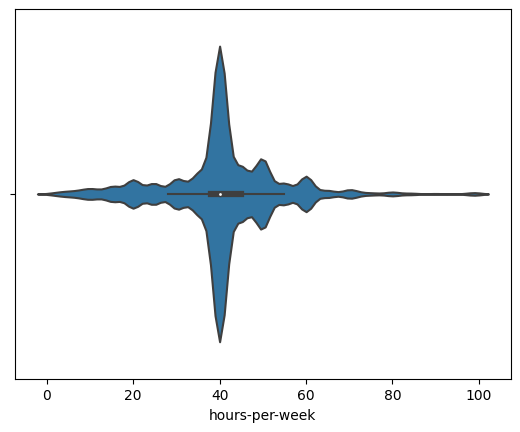

In [38]:
sns.violinplot(x=df["hours-per-week"]); # This line of code provides a univariate plot for "hours of the week".

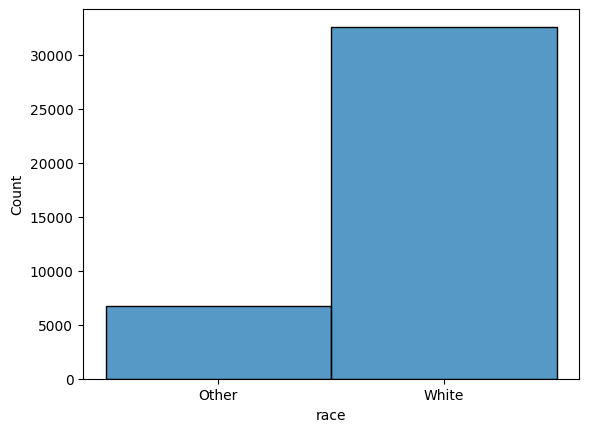

In [39]:
sns.histplot(x="race", data=df); # This line of code provides a univariate visual for this value

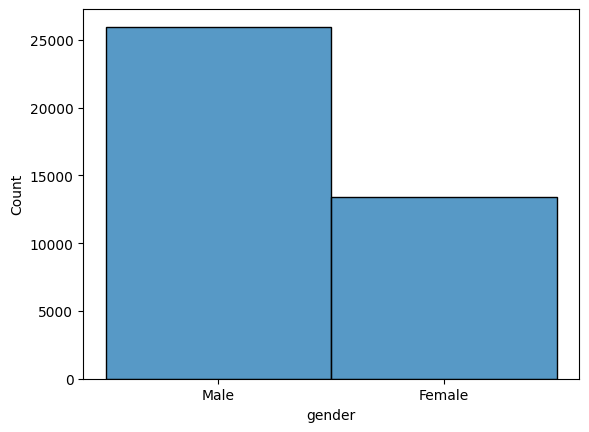

In [40]:
sns.histplot(x="gender", data=df); # This line of code provides a univariate visual for this value

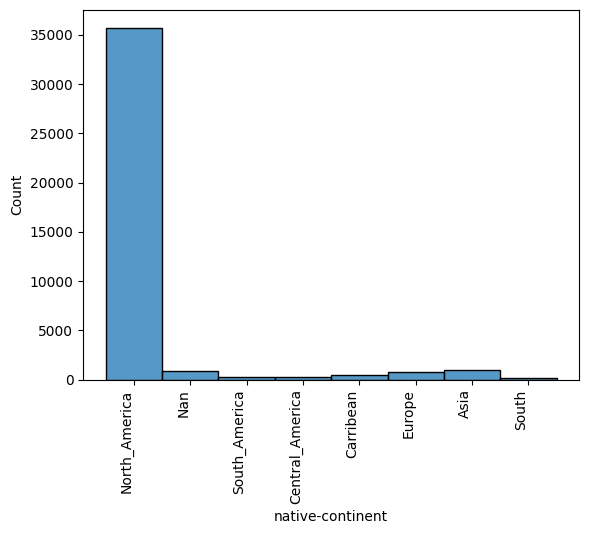

In [41]:
sns.histplot(x="native-continent", data=df);
plt.xticks(rotation=90, ha='right') # This line of code provides a univariate visual for this value
fig.tight_layout()  
plt.show()

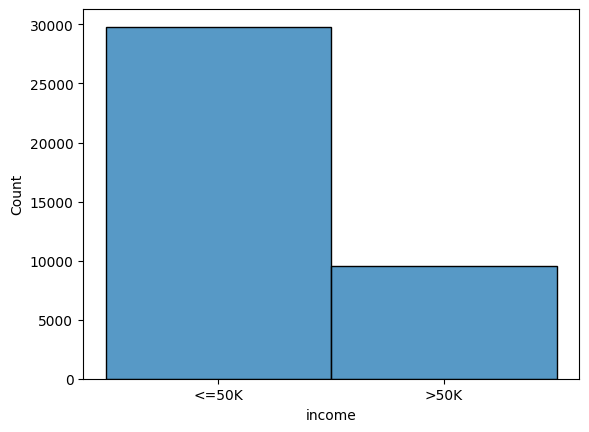

In [42]:
sns.histplot(x="income", data=df); # This line of code provides a univariate visual for this value

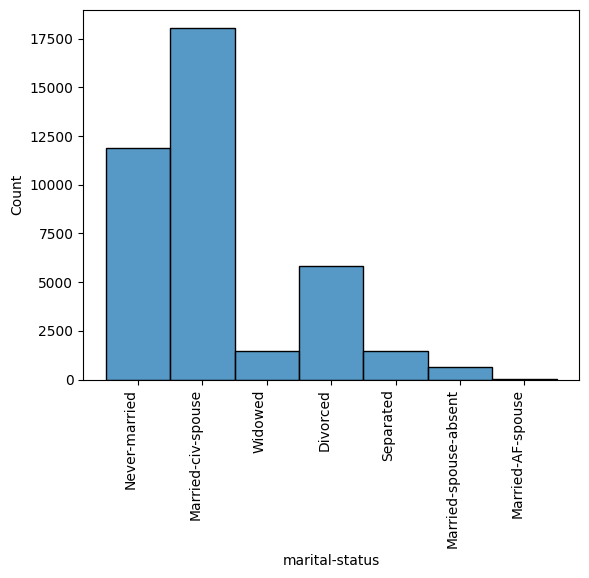

In [43]:
sns.histplot(x="marital-status", data=df);
plt.xticks(rotation=90, ha='right')
fig.tight_layout()  # This line of code provides a univariate visual for this value
plt.show()

- This visual shows that overwhelmingly, the workclass in the Private category makes up the majority.

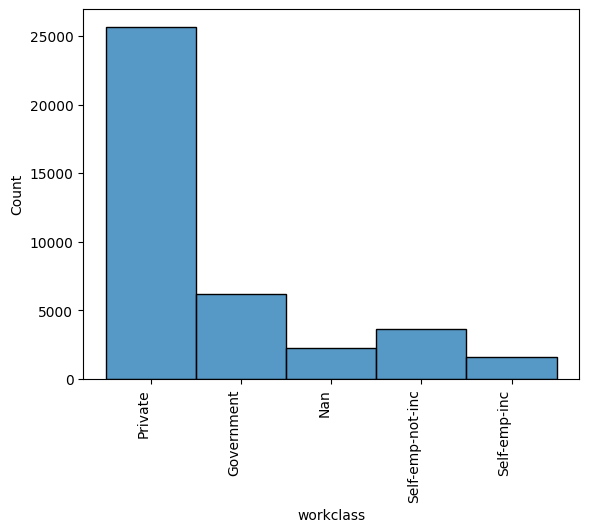

In [44]:
sns.histplot(x="workclass", data=df);
plt.xticks(rotation=90, ha='right')
fig.tight_layout()  
plt.show() # This line of code provides a univariate visual for this value

- This visual shows that the majority of the samples reflect the majority received High School and some College education.

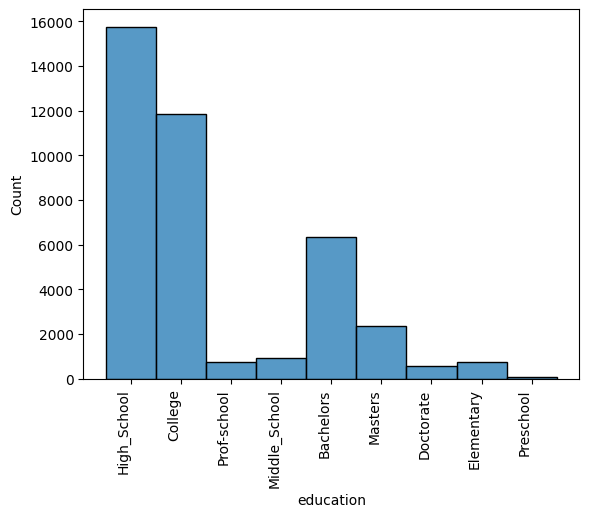

In [45]:
sns.histplot(x="education", data=df);
plt.xticks(rotation=90, ha='right')
fig.tight_layout()  
plt.show() # This line of code provides a univariate visual for this value

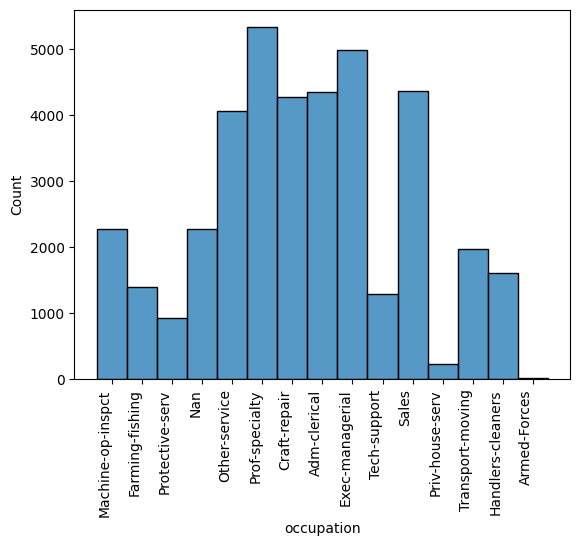

In [46]:
sns.histplot(x="occupation", data=df);
plt.xticks(rotation=90, ha='right')
fig.tight_layout()  
plt.show() # This line of code provides a univariate visual for this value

#Identifying any moderate or strong correlations between your target and your features and/or between one feature and another using a correlation heatmap.

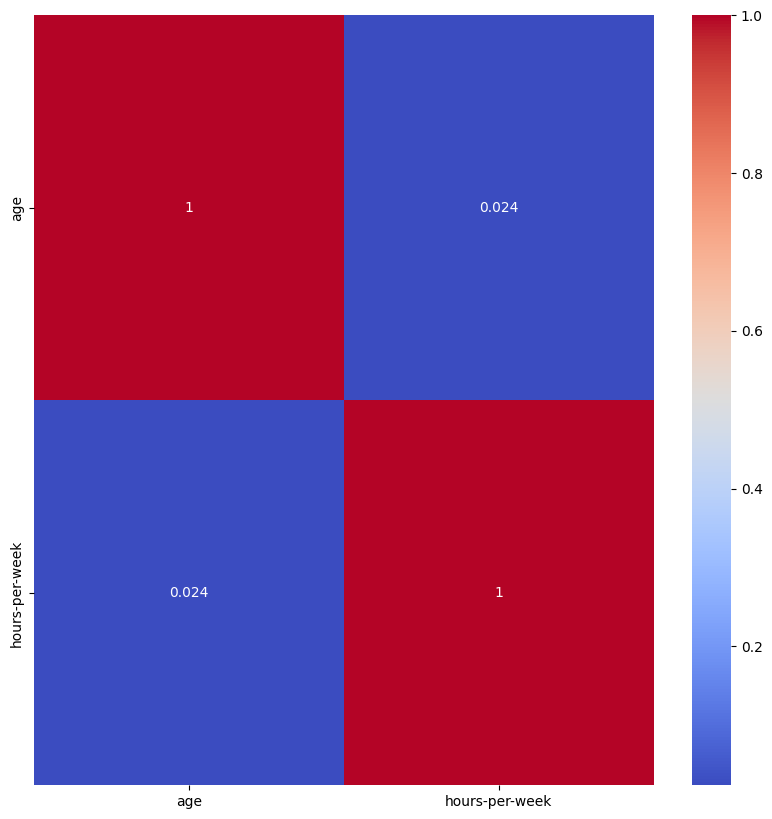

In [47]:
corr = df.corr(numeric_only = True)
corr.round(2)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, cmap = 'coolwarm', annot = True, ax=ax);

##Choose two visualizations from your analysis that demonstrate key trends you found that will be of interest to a stakeholder. These visuals should be reporting quality with titles, labels, and a short explanation of the trend. Be sure to explain in a text cell the insight associated with each visual. Both of these visualizations should be easily understood by a non-technical audience

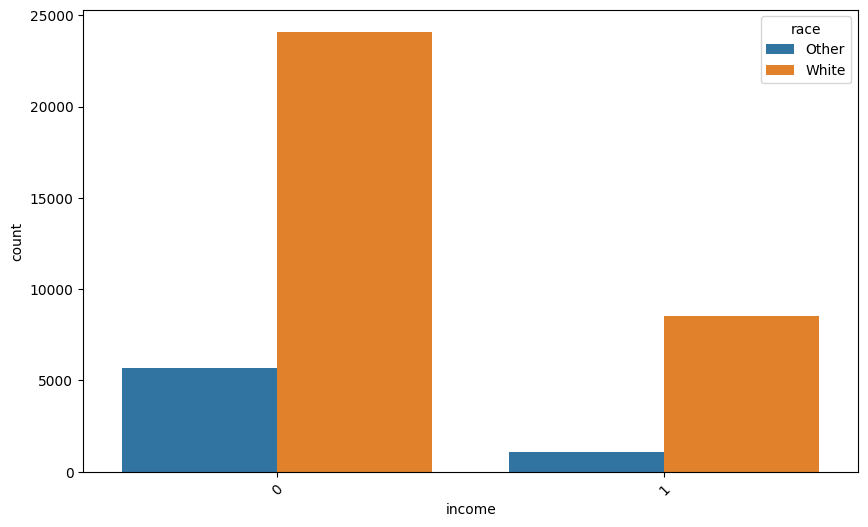

<Figure size 640x480 with 0 Axes>

In [131]:
# sns.scatterplot(data=df, x="income", y="race", hue="race")
fig,ax = plt.subplots(figsize=(10,6))
# 
sns.countplot(data=df, x="income", hue="race")
plt.setp(ax.get_xticklabels(), rotation = 45)
# display plots
plt.show()
plt.tight_layout();

- This plot shows a correlation between race and income as related to occupation. This yields some interesting trends with regard to the occupations that have an income higher than 50k and which race and professions seem to occupy those most. Inferences cannot be fully made based solely on this visual alone.

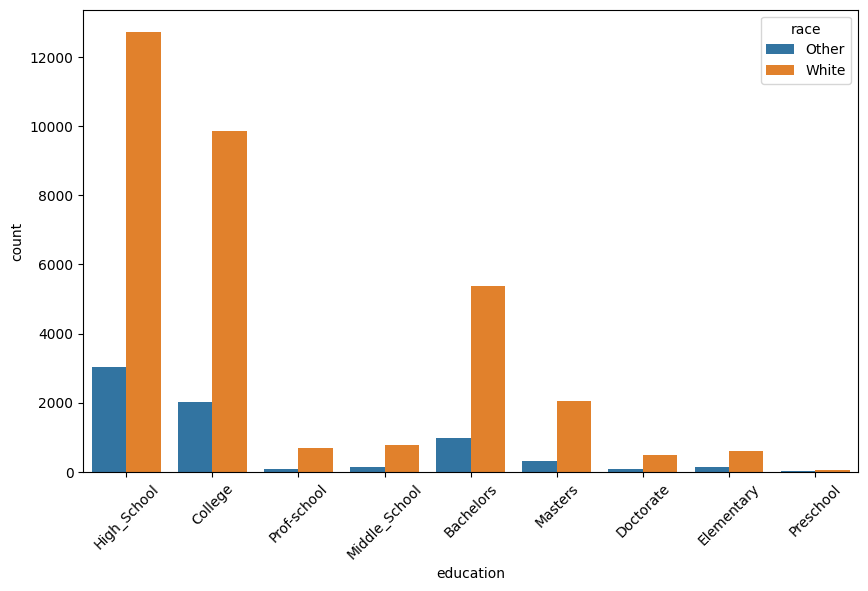

<Figure size 640x480 with 0 Axes>

In [49]:
# sns.scatterplot(data=df, x="education", y="race", hue="race")
fig,ax = plt.subplots(figsize=(10,6))
# 
sns.countplot(data=df, x="education", hue="race")
plt.setp(ax.get_xticklabels(), rotation = 45)
# display plots
plt.show()
plt.tight_layout();

## This visual shows a clear correlation between education and race as illustrated by the color bars.

- There appears to be a strong correlation between race and higher levels of education. This shows a disparity of an educational advantage favoring some race distinctions. This is an interesting trend to take note of.

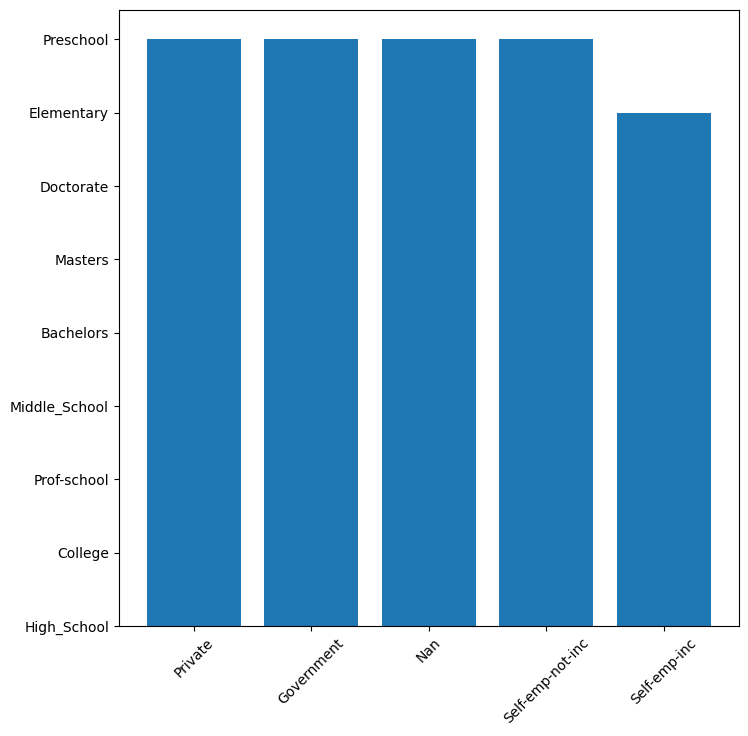

In [50]:
fig, ax = plt.subplots(figsize=(8,8))

bars = plt.bar(df["workclass"], df["education"])
plt.setp(ax.get_xticklabels(), rotation = 45)
plt.show()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39390 entries, 0 to 48841
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               39390 non-null  int64 
 1   workclass         39390 non-null  object
 2   education         39390 non-null  object
 3   marital-status    39390 non-null  object
 4   occupation        39390 non-null  object
 5   race              39390 non-null  object
 6   gender            39390 non-null  object
 7   hours-per-week    39390 non-null  int64 
 8   native-continent  39390 non-null  object
 9   income            39390 non-null  object
dtypes: int64(2), object(8)
memory usage: 3.3+ MB


In [52]:
df["income"].value_counts() # This Feature is an object datatype

<=50K    29808
>50K      9582
Name: income, dtype: int64

In [53]:
df["income"] = df["income"].replace({"<=50K":0,">50K":1})
df["income"].value_counts()

0    29808
1     9582
Name: income, dtype: int64

In [54]:
df["income"].nunique()

2

In [103]:
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay, \
classification_report

from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression # This line of code import Logistic Regression
from sklearn.neighbors import KNeighborsClassifier # This line of code imports KNeighbors Classifier
from sklearn.ensemble import RandomForestClassifier # This line imports Random Forest Classifier
import warnings
warnings.filterwarnings('ignore')

## Format for ML and Train Test Split

In [56]:
X = df.drop(columns="income") # These lines of code split our data
y = df["income"]
y = y.replace({"<=50K":0,">50K":1})
X_train, X_test, y_train,y_test = train_test_split(X, y, random_state =42)

### Instantiate transformers

In [112]:
scaler =StandardScaler()
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

### Instantiate the Column Selectors

In [58]:
# Instantiate the column selectors
num_selector = make_column_selector(dtype_include="number")
cat_selector = make_column_selector(dtype_include="object")

### Match Transformers with Columns

In [113]:
num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)

### Instantiate Column Transformer

In [114]:
preprocessor = make_column_transformer(num_tuple, 
                                       cat_tuple, 
                                       remainder='drop',
                                       verbose_feature_names_out=False)

### Fit the Preprocessor

In [115]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5de1d2b4c0>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5de1d2a920>)],
                  verbose_feature_names_out=False)

## Fit The Model

In [62]:
## Create an instance of the model
rf = RandomForestClassifier(random_state=42)

## Create a model pipeline
rf_pipe = make_pipeline(preprocessor, rf)

## Fit the model
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5de1d2b4c0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5de1d2a920>)],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [65]:
## Define a function that takes in arguments and prints out a classification report and confusion matrix
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                            cmap='Greens', normalize=None, classes=None, 
                            figsize=(20,5), name='Classification Model', 
                            average='binary', zero_division=0):
  """Takes as required arguments: a model, traing features, training labels,
  testing feature, testing labels
  Prints a classification reports and confusion matrics for each data set
  returns a dataframe of metrics

  Optional arguments: 
    cmap: colormap 
    normalize: confusion matrix normalization ['true', 'pred', 'all' or None]
    classes: ordered list of class labels
    figsize: size of figure
    name: give your model a name
    average: how to aggregate scores for multiclass problems
    zero_division: what should the result of divide by zero be?"""

  # Gather model predictions
  train_preds = model.predict(X_train)
  test_preds = model.predict(X_test)

  # Display classification report and confusion matrices
  print('======Train Set Metrics======')
  print(metrics.classification_report(y_train, train_preds, 
                                      zero_division=0,
                                      target_names=classes))
  
  print('======Test Set Metrics======')
  print(metrics.classification_report(y_test, test_preds, 
                                      zero_division=0,
                                      target_names=classes))

  fig, axes = plt.subplots(ncols=2, figsize=figsize)

  ConfusionMatrixDisplay.from_predictions(y_train, train_preds, cmap=cmap, 
                                display_labels=classes,
                                normalize=normalize, ax=axes[0])
  axes[0].set_title('Train Confusion Matrix')

  ConfusionMatrixDisplay.from_predictions(y_test, test_preds, cmap=cmap, 
                              display_labels=classes,
                              normalize=normalize, ax=axes[1])
  axes[1].set_title('Test Confusion Matrix')
  plt.show()

  # If there are more than 2 classes and an average has not been set, 
  # set average to 'macro'
  if average == 'binary' and y_train.nunique() > 2:
    average = 'macro'

  # Create a dataframe of scores to return
  scores = pd.DataFrame()
  
  # Training

  scores.loc[name, 'Train Accuracy'] = accuracy_score(y_train, train_preds)
  scores.loc[name, 'Train Recall'] = recall_score(y_train, train_preds,
                                                           average=average,
                                                       zero_division=zero_division)
  scores.loc[name, 'Train Precision'] = precision_score(y_train, train_preds,
                                                           average=average,
                                                      zero_division=zero_division)
  scores.loc[name, 'Train F1-Score'] = f1_score(y_train, train_preds,
                                                           average=average,
                                                     zero_division=zero_division)
  
  # Testing
  scores.loc[name, 'Test Accuracy'] = accuracy_score(y_test, test_preds)
  scores.loc[name, 'Test Recall'] = recall_score(y_test, test_preds,
                                                           average=average,
                                                      zero_division=zero_division)
  scores.loc[name, 'Test Precision'] = precision_score(y_test, test_preds,
                                                           average=average,
                                                      zero_division=zero_division)
  scores.loc[name, 'Test F1-Score'] = f1_score(y_test, test_preds,
                                                           average=average,
                                                     zero_division=zero_division)

  return scores

======Train Set Metrics======
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     22403
           1       0.93      0.91      0.92      7139

    accuracy                           0.96     29542
   macro avg       0.95      0.95      0.95     29542
weighted avg       0.96      0.96      0.96     29542

======Test Set Metrics======
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      7405
           1       0.55      0.48      0.52      2443

    accuracy                           0.77      9848
   macro avg       0.69      0.68      0.68      9848
weighted avg       0.77      0.77      0.77      9848



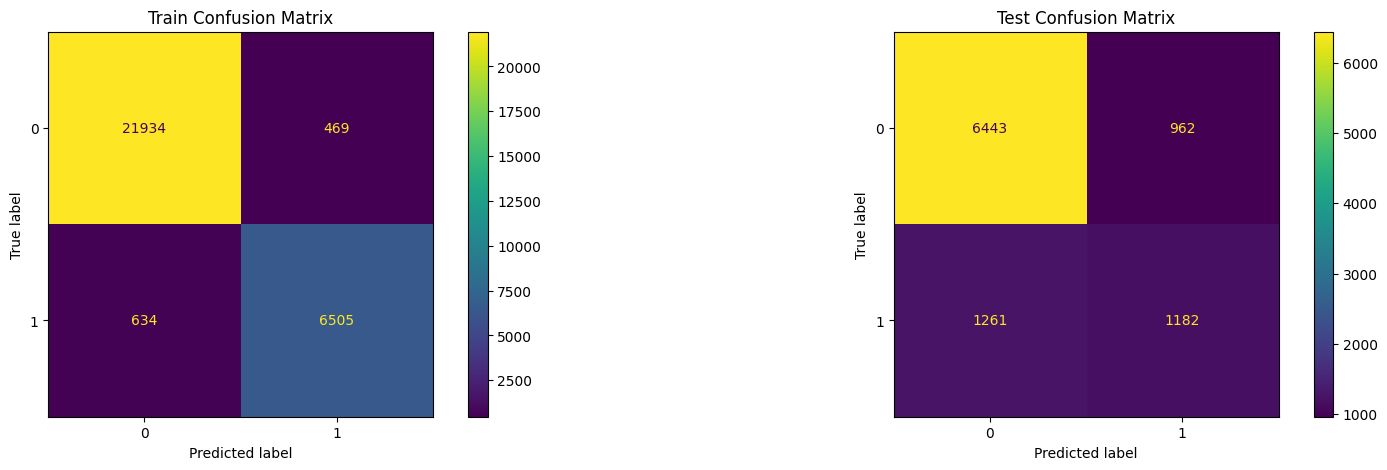

,Train Accuracy,Train Recall,Train Precision,Train F1-Score,Test Accuracy,Test Recall,Test Precision,Test F1-Score
Random Forest Model,0.962663,0.911192,0.93275,0.921845,0.774269,0.483831,0.551306,0.51537


In [69]:
evaluate_classification(rf_pipe, X_train, y_train, X_test, y_test,
                            cmap='viridis', normalize=None, classes=None, 
                            figsize=(20,5), name='Random Forest Model', 
                            average='binary', zero_division=0)

## Tune the RF Model

### Instantiate GridSearchCV

In [70]:
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f5de1d2b4c0>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore'),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f5de1d2a920>)],
                     verbose_feature_names_out=False)),
  ('randomforestclassifier', RandomForestClassifier(random_state=42))],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5de1d2b4c0>),
                                 ('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore'),
                     

In [74]:
rf_params_gs = {"randomforestclassifier__max_depth": list(range(1,10)), # This block of code created a parameter dictionary for the Random Forest Model for hypertuning next.
                  "randomforestclassifier__n_estimators": list(range(1,25,5))}
                  

In [75]:
rf_gs = GridSearchCV(rf_pipe, rf_params_gs)

In [77]:
rf_gs.best_params_

{'randomforestclassifier__max_depth': 9,
 'randomforestclassifier__n_estimators': 16}

In [76]:
rf_gs.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f5de1d2b4c0>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f5de1d2a920>)],
                                                          verbose_feature_names_out=False)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'randomforestclassifier__max_depth': [1, 2, 3, 4, 5, 6,
                                                               7, 8, 9],
                         'randomforestclassifier__n_estimators': [1, 6, 11, 16,
                                                                  21]})

In [78]:
# Create a model pipeline
rf_tuned_pipe = rf_gs.best_estimator_

## Fit the model
rf_tuned_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5de189f0d0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5de189cee0>)],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=9, n_estimators=16,
                                        random_state=42))])

======Train Set Metrics======
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     22403
           1       0.74      0.41      0.53      7139

    accuracy                           0.82     29542
   macro avg       0.79      0.68      0.71     29542
weighted avg       0.81      0.82      0.80     29542

======Test Set Metrics======
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7405
           1       0.73      0.40      0.52      2443

    accuracy                           0.81      9848
   macro avg       0.78      0.67      0.70      9848
weighted avg       0.80      0.81      0.79      9848



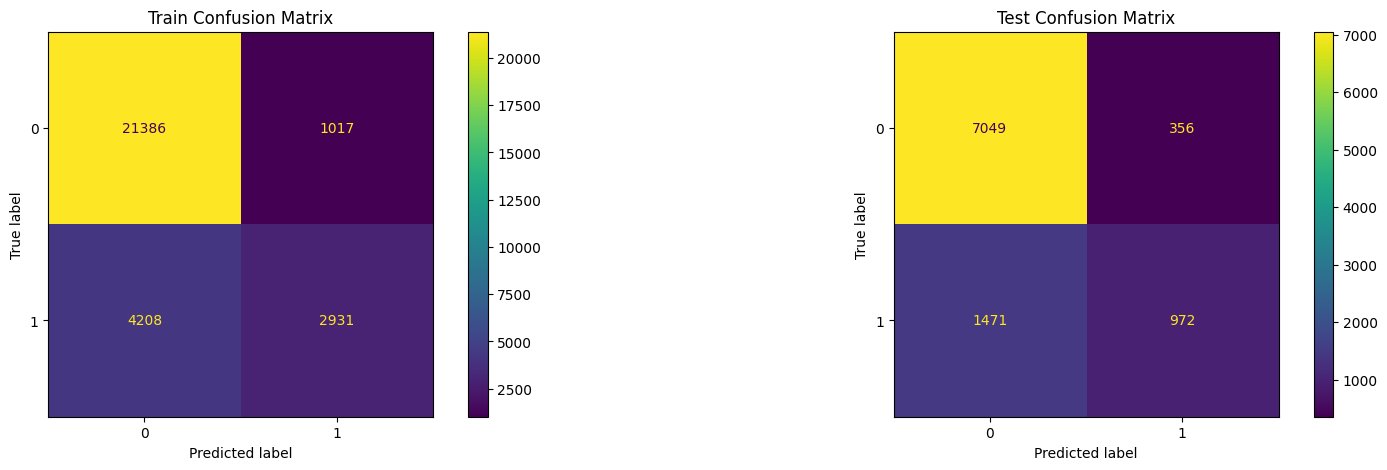

,Train Accuracy,Train Recall,Train Precision,Train F1-Score,Test Accuracy,Test Recall,Test Precision,Test F1-Score
Random Forest Tuned,0.823133,0.410562,0.742401,0.528727,0.81448,0.397871,0.731928,0.515513


In [79]:
evaluate_classification(rf_tuned_pipe, X_train, y_train, X_test, y_test,
                            cmap='viridis', normalize=None, classes=None, 
                            figsize=(20,5), name='Random Forest Tuned', 
                            average='binary', zero_division=0)

## Fit The KN Model

In [81]:
## Create an instance of the model
kn = KNeighborsClassifier()

## Create a model pipeline
kn_pipe = make_pipeline(preprocessor, kn)

## Fit the model
kn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5de1d2b4c0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5de1d2a920>)],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

======Train Set Metrics======
              precision    recall  f1-score   support

           0       0.89      0.92      0.91     22403
           1       0.73      0.65      0.69      7139

    accuracy                           0.86     29542
   macro avg       0.81      0.79      0.80     29542
weighted avg       0.85      0.86      0.86     29542

======Test Set Metrics======
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      7405
           1       0.60      0.52      0.56      2443

    accuracy                           0.79      9848
   macro avg       0.72      0.70      0.71      9848
weighted avg       0.79      0.79      0.79      9848



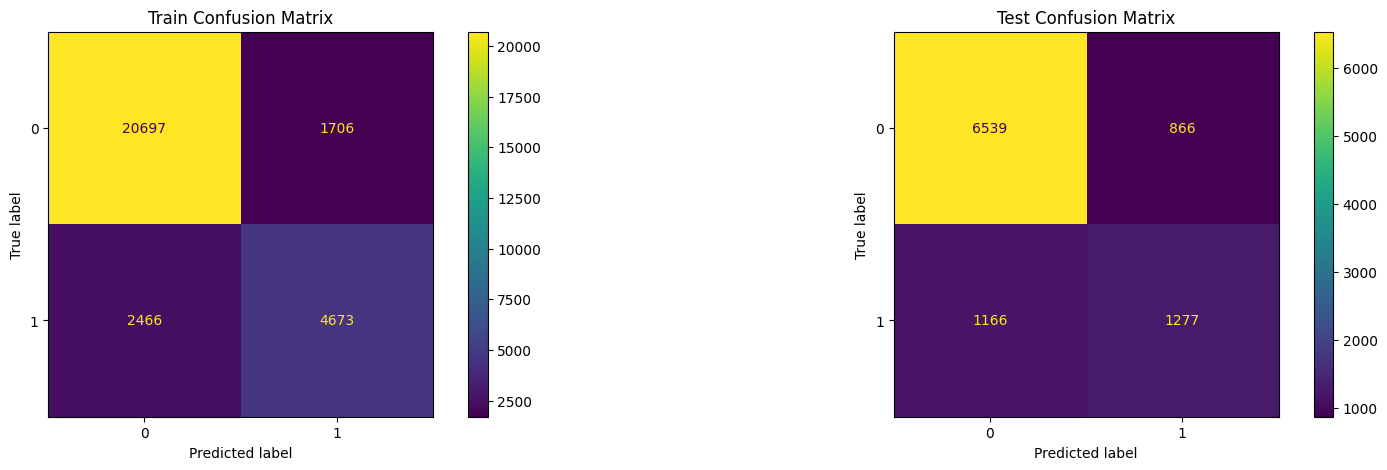

,Train Accuracy,Train Recall,Train Precision,Train F1-Score,Test Accuracy,Test Recall,Test Precision,Test F1-Score
KN Model,0.858777,0.654573,0.73256,0.691374,0.793664,0.522718,0.595894,0.556912


In [82]:
evaluate_classification(kn_pipe, X_train, y_train, X_test, y_test,
                            cmap="viridis", normalize=None, classes=None, 
                            figsize=(20,5), name="KN Model", 
                            average="binary", zero_division=0)

## Tune the Model

In [83]:
kn_params_gs = {"kneighborsclassifier__n_neighbors": list(range(1,10,2))}, # This block of code created a parameter dictionary for the KN Model for tuning.          

In [85]:
kn_gs = GridSearchCV(kn_pipe, kn_params_gs)

In [87]:
kn_gs.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f5de1d2b4c0>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f5de1d2a920>)],
                                                          verbose_feature_names_out=False)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid=({'kneighborsclassifier__n_neighbors': [1, 3, 5, 7,
                                                                9]},))

In [88]:
kn_gs.best_params_

{'kneighborsclassifier__n_neighbors': 9}

In [89]:
# Create a model pipeline
kn_tuned_pipe = kn_gs.best_estimator_

## Fit the model
kn_tuned_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5de0da50c0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5de0da7df0>)],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=9))])

======Train Set Metrics======
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     22403
           1       0.71      0.61      0.65      7139

    accuracy                           0.84     29542
   macro avg       0.79      0.76      0.78     29542
weighted avg       0.84      0.84      0.84     29542

======Test Set Metrics======
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      7405
           1       0.63      0.53      0.57      2443

    accuracy                           0.80      9848
   macro avg       0.74      0.71      0.72      9848
weighted avg       0.80      0.80      0.80      9848



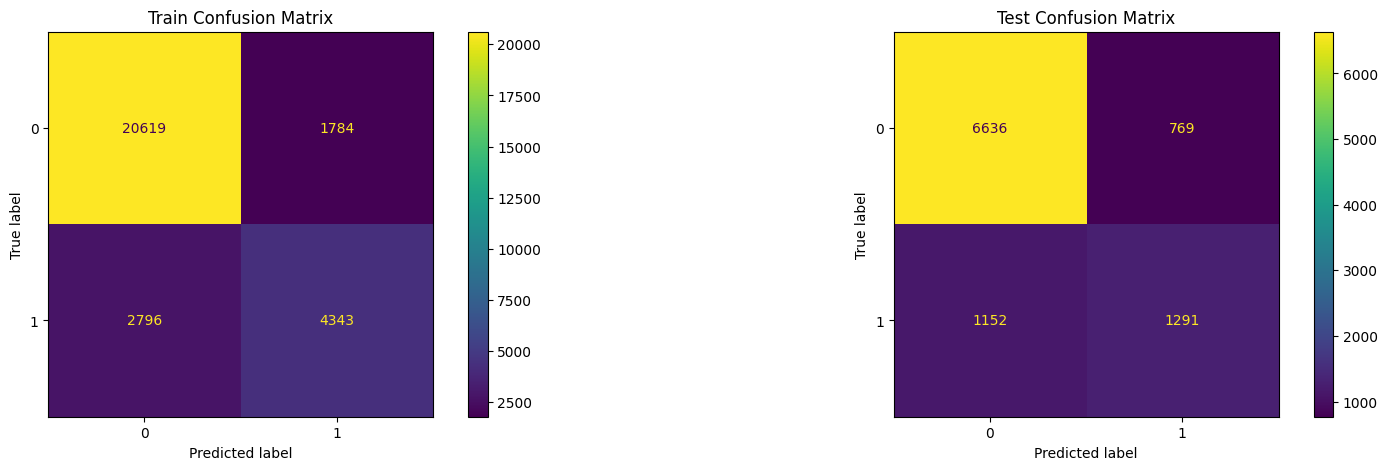

,Train Accuracy,Train Recall,Train Precision,Train F1-Score,Test Accuracy,Test Recall,Test Precision,Test F1-Score
KN Tuned Model,0.844966,0.608349,0.70883,0.654757,0.804935,0.528449,0.626699,0.573396


In [90]:
evaluate_classification(kn_tuned_pipe, X_train, y_train, X_test, y_test,
                            cmap="viridis", normalize=None, classes=None, 
                            figsize=(20,5), name="KN Tuned Model", 
                            average="binary", zero_division=0)

In [91]:
## Create an instance of the model
lr = LogisticRegression(random_state=42)

## Create a model pipeline
lr_pipe = make_pipeline(preprocessor, lr)

## Fit the model
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5de1d2b4c0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5de1d2a920>)],
                                   verbose_feature_names_out=False)),
                ('logisticregression', LogisticRegression(random_state=42))])

======Train Set Metrics======
              precision    recall  f1-score   support

           0       0.85      0.92      0.89     22403
           1       0.67      0.50      0.58      7139

    accuracy                           0.82     29542
   macro avg       0.76      0.71      0.73     29542
weighted avg       0.81      0.82      0.81     29542

======Test Set Metrics======
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      7405
           1       0.69      0.51      0.59      2443

    accuracy                           0.82      9848
   macro avg       0.77      0.72      0.74      9848
weighted avg       0.81      0.82      0.81      9848



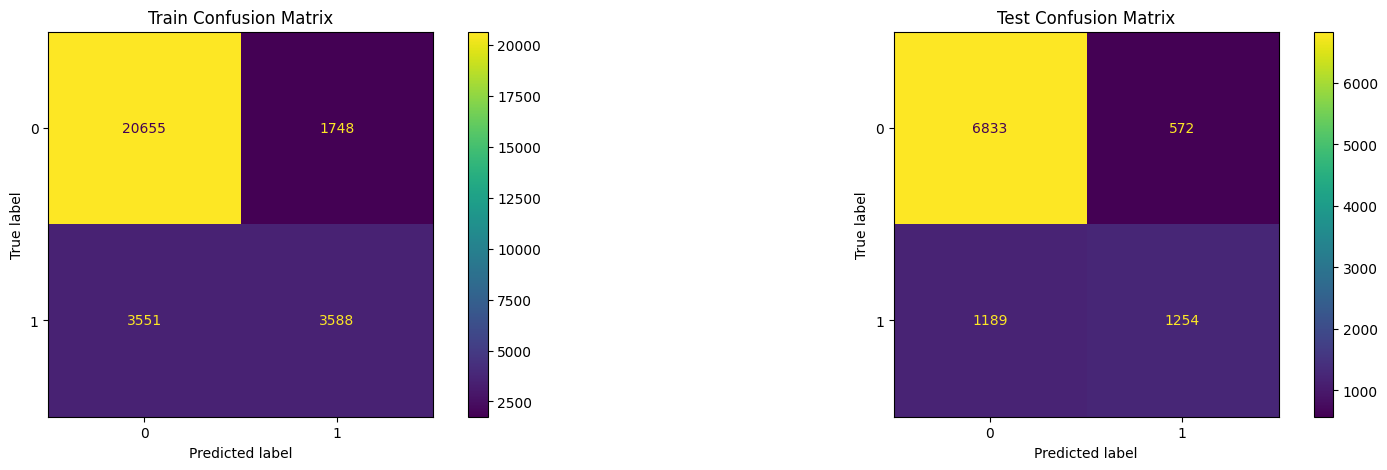

,Train Accuracy,Train Recall,Train Precision,Train F1-Score,Test Accuracy,Test Recall,Test Precision,Test F1-Score
LR Model,0.820628,0.502591,0.672414,0.57523,0.821182,0.513303,0.686747,0.587491


In [92]:
evaluate_classification(lr_pipe, X_train, y_train, X_test, y_test,
                            cmap="viridis", normalize=None, classes=None, 
                            figsize=(20,5), name="LR Model", 
                            average="binary", zero_division=0)

## Tune the Model

In [94]:
lr_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f5de1d2b4c0>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore'),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f5de1d2a920>)],
                     verbose_feature_names_out=False)),
  ('logisticregression', LogisticRegression(random_state=42))],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5de1d2b4c0>),
                                 ('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore'),
                             

In [95]:
lr_params = {'logisticregression__C': [.01,.10,1.0,10.,100.],'logisticregression__penalty': ["l1","l2",None]}

In [97]:
lr_gs = GridSearchCV(lr_pipe, lr_params)

In [99]:
lr_gs.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f5de1d2b4c0>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f5de1d2a920>)],
                                                          verbose_feature_names_out=False)),
                                       ('logisticregression',
                                        LogisticRegression(random_state=42))]),
             param_grid={'logisticregression__C': [0.01, 0.1, 1.0, 10.0, 100.0],
                         'logisticregression__penalty': ['l1', 'l2', None]})

In [100]:
lr_gs.best_params_

{'logisticregression__C': 10.0, 'logisticregression__penalty': 'l2'}

In [101]:
# Create a model pipeline
lr_tuned_pipe = lr_gs.best_estimator_

## Fit the model
lr_tuned_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5de0a9a410>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5de0a9a050>)],
                                   verbose_feature_names_out=False)),
                ('logisticregression',
                 LogisticRegression(C=10.0, random_state=42))])

======Train Set Metrics======
              precision    recall  f1-score   support

           0       0.85      0.92      0.89     22403
           1       0.67      0.50      0.58      7139

    accuracy                           0.82     29542
   macro avg       0.76      0.71      0.73     29542
weighted avg       0.81      0.82      0.81     29542

======Test Set Metrics======
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      7405
           1       0.69      0.51      0.59      2443

    accuracy                           0.82      9848
   macro avg       0.77      0.72      0.74      9848
weighted avg       0.81      0.82      0.81      9848



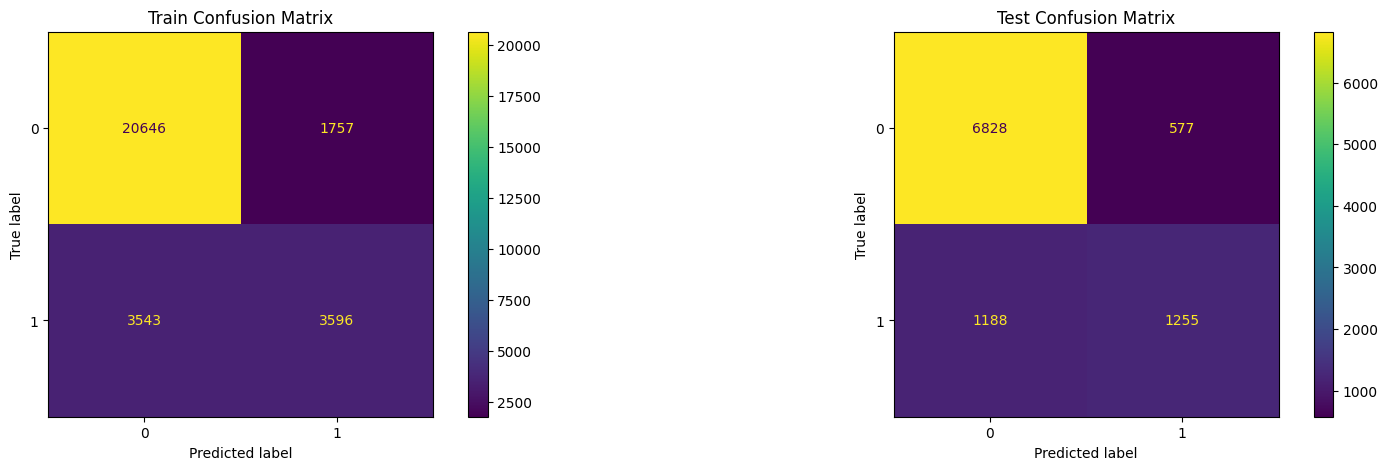

,Train Accuracy,Train Recall,Train Precision,Train F1-Score,Test Accuracy,Test Recall,Test Precision,Test F1-Score
LR Tuned Model,0.820594,0.503712,0.671773,0.575728,0.820776,0.513713,0.685044,0.587135


In [102]:
evaluate_classification(lr_tuned_pipe, X_train, y_train, X_test, y_test,
                            cmap="viridis", normalize=None, classes=None, 
                            figsize=(20,5), name="LR Tuned Model", 
                            average="binary", zero_division=0)

### Applying the PCA to Random Forest and Scaling DataSet

In [116]:
 scaler = StandardScaler(with_mean=False)
 preprocessor_scaler = make_pipeline(preprocessor,scaler)

In [117]:
pca = PCA(n_components=.95)
scaled_df = preprocessor_scaler.fit_transform(df)
pcs = pca.fit(scaled_df)

In [121]:
rf = RandomForestClassifier()
preprocessorpca_pipe = make_pipeline(preprocessor, pca)

In [122]:
rf_pca_pipe = make_pipeline(preprocessorpca_pipe, rf)

In [124]:
rf_pca_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('standardscaler',
                                                                   StandardScaler(),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f5de1d2b4c0>),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f5de1d2a920>)],
                                                    verbose_feature_names_out=False)),
                                 ('pca', PCA(n_components=0.95))])),
                ('randomforestclassifier', RandomForestClassifier())])

======Train Set Metrics======
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     22403
           1       0.93      0.91      0.92      7139

    accuracy                           0.96     29542
   macro avg       0.95      0.94      0.95     29542
weighted avg       0.96      0.96      0.96     29542

======Test Set Metrics======
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      7405
           1       0.56      0.47      0.51      2443

    accuracy                           0.78      9848
   macro avg       0.70      0.67      0.68      9848
weighted avg       0.77      0.78      0.77      9848



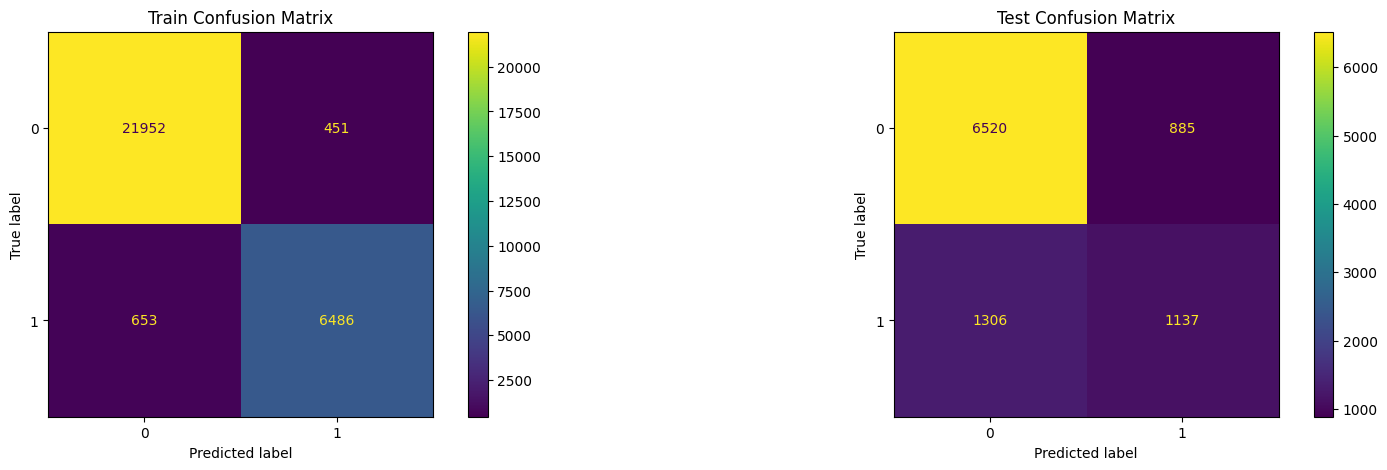

,Train Accuracy,Train Recall,Train Precision,Train F1-Score,Test Accuracy,Test Recall,Test Precision,Test F1-Score
RF PCA Model,0.962629,0.908531,0.934986,0.921569,0.777518,0.465411,0.562315,0.509295


In [125]:
evaluate_classification(rf_pca_pipe, X_train, y_train, X_test, y_test,
                            cmap="viridis", normalize=None, classes=None, 
                            figsize=(20,5), name="RF PCA Model", 
                            average="binary", zero_division=0)

- The Random Forest Model with the PCA engineering showed a slightly higer accuracy score than the Random Forest Model without it. It seems to enhance the Model result. 

## Applying the PCA to the Logistic Regression Model

- Make PCA preprocesssor

In [127]:
lr = LogisticRegression(random_state=42) # Instantiate Log Regression Model
preprocessorpca_pipe = make_pipeline(preprocessor, pca)

In [128]:
lr_pca_pipe = make_pipeline(preprocessorpca_pipe, lr)

- Fit the pipe on the training data

In [129]:
lr_pca_pipe.fit(X_train,y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('standardscaler',
                                                                   StandardScaler(),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f5de1d2b4c0>),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f5de1d2a920>)],
                                                    verbose_feature_names_out=False)),
                                 ('pca', PCA(n_components=0.95))])),
                ('logisticregression', LogisticRegression(random_state=42))])

======Train Set Metrics======
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     22403
           1       0.66      0.48      0.56      7139

    accuracy                           0.81     29542
   macro avg       0.75      0.70      0.72     29542
weighted avg       0.80      0.81      0.80     29542

======Test Set Metrics======
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      7405
           1       0.67      0.48      0.56      2443

    accuracy                           0.81      9848
   macro avg       0.76      0.70      0.72      9848
weighted avg       0.80      0.81      0.80      9848



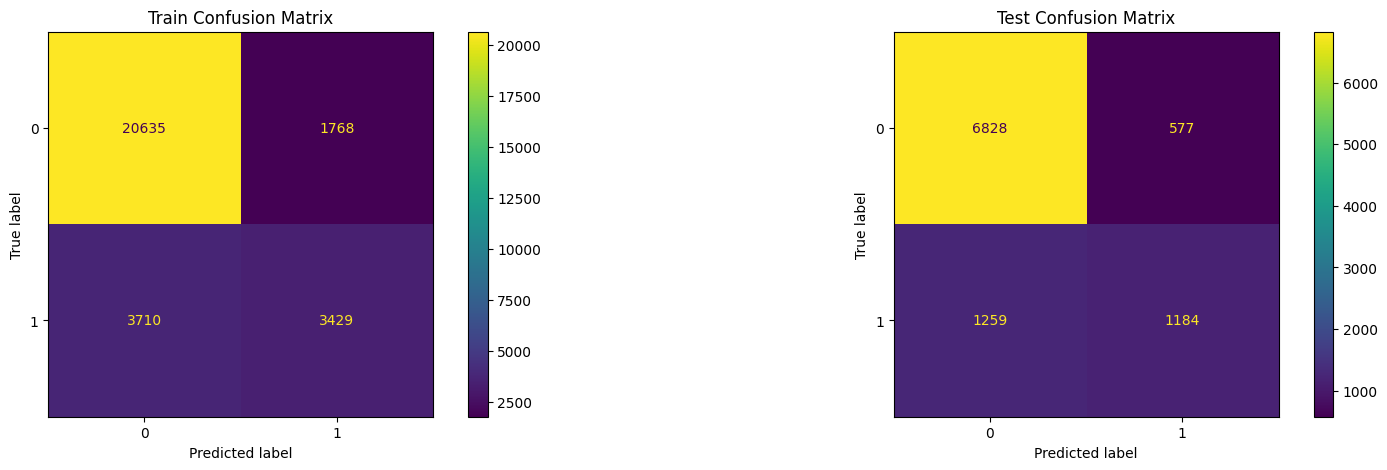

,Train Accuracy,Train Recall,Train Precision,Train F1-Score,Test Accuracy,Test Recall,Test Precision,Test F1-Score
LR PCA Model,0.814569,0.480319,0.659804,0.555934,0.813566,0.48465,0.672345,0.563273


In [130]:
evaluate_classification(lr_pca_pipe, X_train, y_train, X_test, y_test,
                            cmap="viridis", normalize=None, classes=None, 
                            figsize=(20,5), name="LR PCA Model", 
                            average="binary", zero_division=0)

- This application of PCA to the Log Regression Model seemed not to yield enhanced results when examining the Test Accuracy Metric

### Given the results of all the models and the nature of the business question: I would recommend using the Tuned Random Forest Model as my Production Model. It shows the highest metrics particularly in the category of precision. In other words, it shows itself to be the highest predictive model in the most number of samples that actually were shown to be in the positive class. As this is a classification task of whether the income in the sample crosses a threshhold of 50k or higher, yes or no, this metric yields the most value with fewer false positives also. 